### Practice Problem 1 
Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? 

Step - 1:

Alternate Hypothesis (Bold claim):$$ H_1: \mu \ != \ 500  $$

Null Hypothesis (Status Quo):$$ H_0: \mu = \ 500  $$

Step 2: Collect the Sample of size n = 20 and calculate the sample mean

In [4]:
# Step 2: Collect the Sample of size n = 20 and calculate the sample mean
Sample1 = [490, 330, 499, 520, 444, 501, 290, 355 ,220, 470, 500, 495, 496, 496, 498, 508, 480, 433, 497, 420]
xbar = sum(Sample1)/len(Sample1)
xbar

447.1

Step 3: Compute Test Statistic: Here in case $\sigma$ (Population Variance is not given) that's we have compute t score by using this formula $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

To Calculate the t score first we have calculate s (Standard Deviation) by using $$ s = \sqrt{\frac{\sum(x_i - \bar{x})^{2}}{n-1}}$$

In [29]:
# Step 3: Compute Test Statistic: Here in case  𝜎  (Population Variance is not given) that's why we have compute t score and 
# To Calculate the t score first we have calculate s (Standard Deviation) 
# Without using Function 
import math

def vari(Sample,ddof=1):
    n = len(Sample)
    mean = sum(Sample)/n
    return sum((x - mean) ** 2 for x in Sample) / (n - ddof)

def stdev(Sample):
    var = vari(Sample)
    s = math.sqrt(var)
    return s

S = stdev([490, 330, 499, 520, 444, 501, 290, 355 ,220, 470, 500, 495, 496, 496, 498, 508, 480, 433, 497, 420])   

# With using Function
#import statistics 
#statistics.stdev(Sample1)

In [32]:
# Step 3: Now we have to Compute t score 
def t_score(xbar,mu,std_dev,n):
    numerator = xbar - mu 
    denominator = std_dev/math.sqrt(n)
    return numerator/denominator

xbar = sum(Sample1)/len(Sample1)
mu = 500 
std_dev = S
n = len(Sample1)
tscore = t_score(xbar,mu,std_dev,n)
tscore

-2.833833214621345

Step 4: Decide the  significance level or $\alpha$ 

In [35]:
 # Step 4: Decide the  significance level or alpha
import scipy.stats    
confidence_level = 0.95
alpha = 1 - confidence_level  

# After deciding the confidence level or alpha we have to calculate the T Critical value  for two tailed test
# As per our Hypothesis we have to check Two Tailed Test
t_critical = scipy.stats.t.ppf(q=1-.05/2,df=19)
print(t_critical)


2.093024054408263


Text(447.1, 0.0007, 'x_bar')

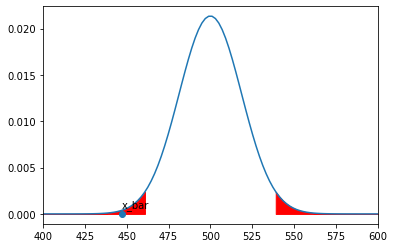

In [41]:
# Now we have to plot sample districbution 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

pop_mean = 500 
sample_size = len(Sample1)
sample_mean = xbar
# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = S / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

Step 5.1 : If test statistic is t-score (here, we have to consider two tail test so we conculde that:-

p) Two tailed t-test:<b> $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$  <b>

In [42]:
# Step 5.1 Conculsion using t test
if(np.abs(tscore) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


Step 5.2 : Compute p-value $ P(Test \ Statistics | H_0) $

a) For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$

In [43]:
# Step 5.2 Compute p-value  𝑃(𝑇𝑒𝑠𝑡 𝑆𝑡𝑎𝑡𝑖𝑠𝑡𝑖𝑐𝑠|𝐻0) 
p_value = 2 * (1.0 - norm.cdf(np.abs(tscore)))

print("p_value = ", p_value)

# Conculsion 
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0045993329743170275
Reject Null Hypothesis
